In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Loading & Cleaning

In [2]:
csv_path = "results/scenarios_results_18_04.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ All rows have consistent 'total_generated_tokens' = 16384
----------------------------------------------------------------------------------------------------
⚠️ FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00]
Original distribution:
flops
0.000000e+00     1
1.694997e+13    85
2.024862e+13     6
Name: count, dtype: int64
- Dominant FLOPs value: 16949970993152.0
- Affected rows count: 7
- Affected row indices: [77, 78, 79, 84, 85, 87, 89]
- Affected configs: ['A0_platonic_ideal', 'R7_anti_platonic_ideal', 'A5_Parallel_Overdrive', 'R2_Low_Latency_Chatbot_Deployment', 'R4_High_Load_Cloud_API_Deployment', 'R6_Medium_Scale_Language_Model_Serving']
----------------------------------------------------------------------------------------------------
✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    92
Name: count, dtype: int64
-----------------------------------------------------------------------------------

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:574: UserWarning: ⚠️ FLOPs values are NOT constant: [1.69499710e+13 2.02486233e+13 0.00000000e+00]
  verify_flops(df)


# Basic understanding on contents

In [3]:
print(f"number of observation: {len(df)}")
print(f"number of scenarios: {len(df['config_name'].unique())}")
print(f"distribution of scenarios:{df['config_name'].value_counts()}")

number of observation: 92
number of scenarios: 12
distribution of scenarios:config_name
A0_platonic_ideal                         13
A5_Parallel_Overdrive                      8
A4_Latency_Ignorance_Exploit               8
A2_Precision_Minimalist                    8
A3_Quantisation_Gaming                     8
A1_Max_Throughput_Exploit                  8
R3_Balanced_Enterprise_Service             7
R4_High_Load_Cloud_API_Deployment          7
R2_Low_Latency_Chatbot_Deployment          7
R7_anti_platonic_ideal                     6
R6_Medium_Scale_Language_Model_Serving     6
R5_Real_Time_Mobile_Inference              6
Name: count, dtype: int64


In [4]:
cols_to_describe = [
    'total_energy_kwh',
    'total_inference_time_sec',
    'average_latency_ms_per_batch',
    'throughput_queries_per_sec',
    'throughput_tokens_per_sec',
    'cpu_energy_total',
    'gpu_energy_total',
    'flops_per_token',
    'energy_per_token_kwh',
    'divergence_energy_flops'
]

df[cols_to_describe].describe()

/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,total_energy_kwh,total_inference_time_sec,average_latency_ms_per_batch,throughput_queries_per_sec,throughput_tokens_per_sec,cpu_energy_total,gpu_energy_total,flops_per_token,energy_per_token_kwh,divergence_energy_flops
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,9.200000e+01,9.200000e+01
mean,0.025699,120.438955,6052.088247,11.741890,1502.961976,0.006858,0.018800,1.036430e+09,1.568530e-06,inf
std,0.066046,278.223634,3461.842343,11.353629,1453.264538,0.014327,0.053385,1.201266e+08,4.031105e-06,NaN
min,0.000436,3.469703,2228.264424,0.105190,13.464332,0.000111,0.000324,0.000000e+00,2.662803e-08,2.573890e-17
25%,0.001607,6.381104,3373.809614,2.326444,297.784887,0.000385,0.000715,1.034544e+09,9.811251e-08,9.483646e-17
50%,0.005326,12.433811,4793.912940,10.295350,1317.804780,0.001266,0.003121,1.034544e+09,3.250902e-07,2.896097e-16
75%,0.011720,55.020529,9395.956516,20.059226,2567.580885,0.002755,0.009827,1.034544e+09,7.153170e-07,6.914321e-16
max,0.325172,1216.844659,17220.920378,36.890766,4722.018095,0.057487,0.267403,1.235878e+09,1.984693e-05,inf


📊 Plotting histogram...


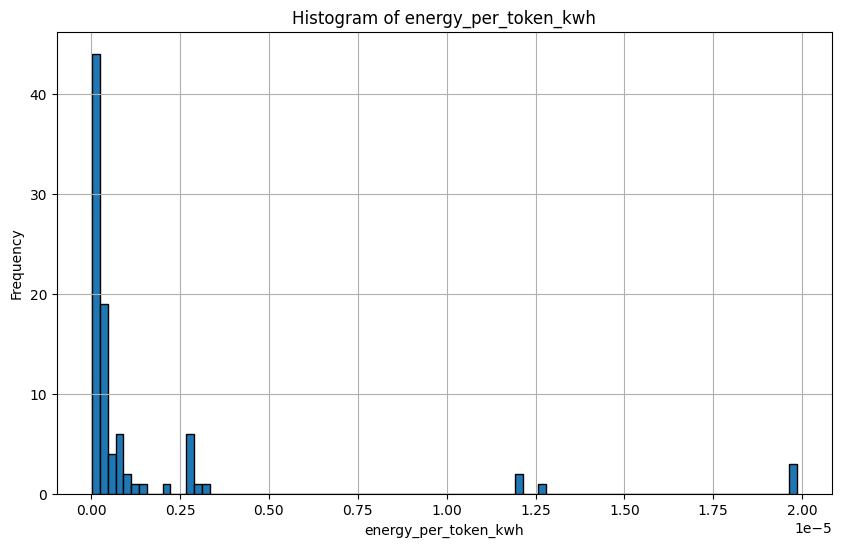

/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:28: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  plt.boxplot(data[column].dropna(), vert=False)


📦 Plotting boxplot...


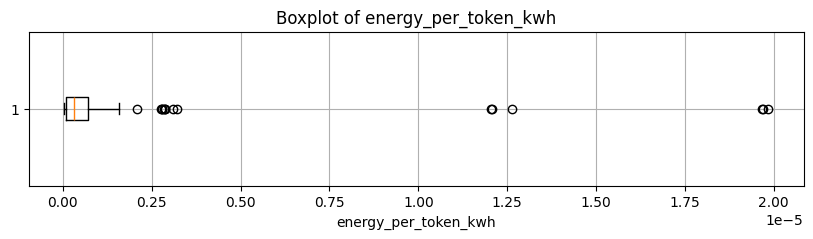

🔬 Scatter: Energy vs FLOPs...


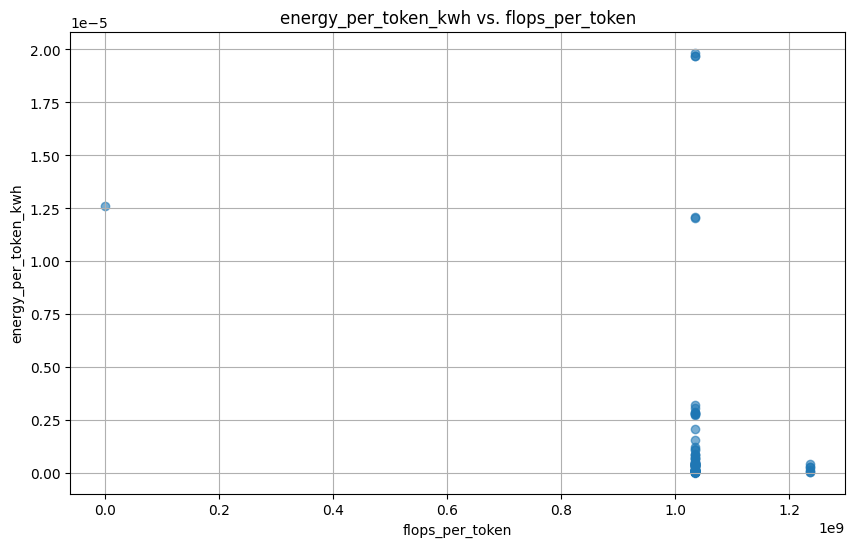

📈 Scatter: Divergence vs Batch Size...


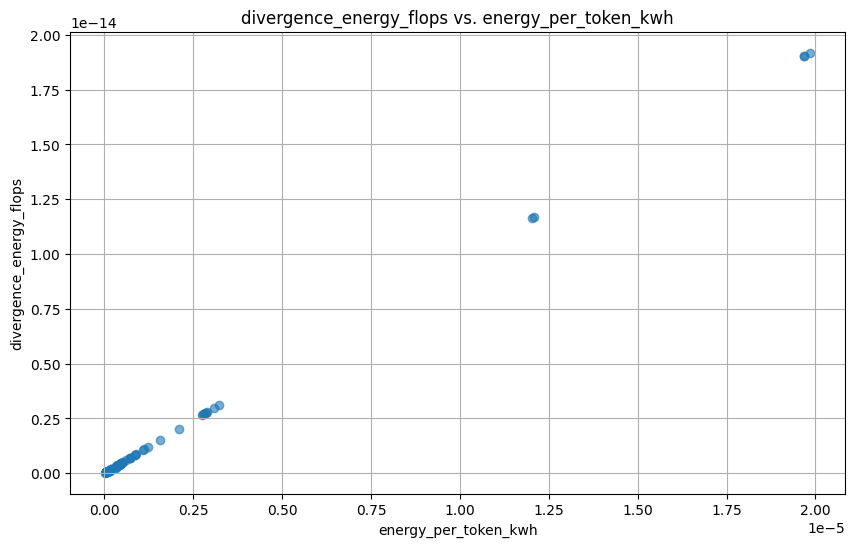

🔗 Correlation matrix...


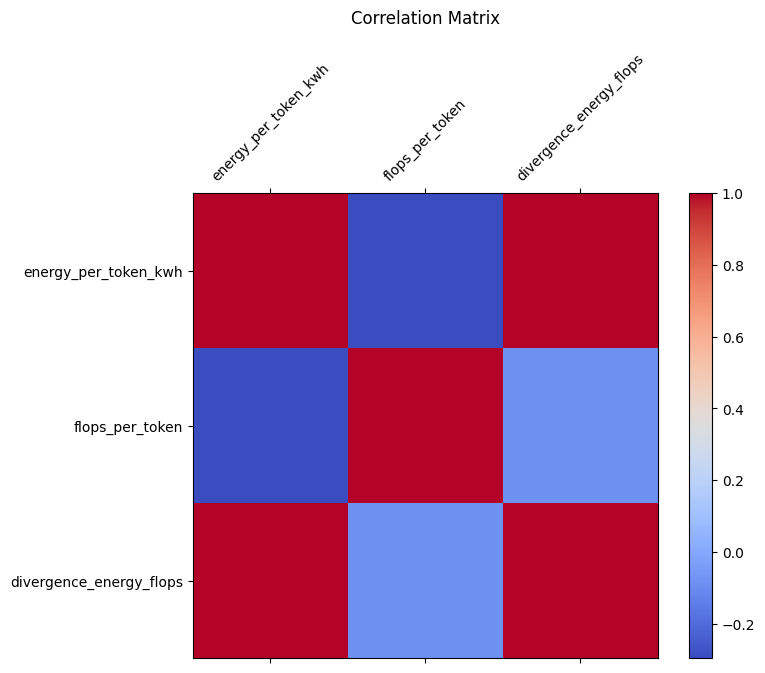

In [5]:
from scripts.b_exploratory_data_analysis import (
    plot_histogram,
    plot_boxplot,
    plot_scatter,
    plot_divergence,
    plot_correlation_matrix,
    plot_all_diagnostics
)

plot_all_diagnostics(df)

To do:
- [X] get the outliers
- [ ] unpack the divergence plot more
- [ ] work on the correlation matrix

In [6]:
# outliers:
outliers = df[(df['energy_per_token_kwh'] - df['energy_per_token_kwh'].mean()).abs() > 3 * df['energy_per_token_kwh'].std()]
print(outliers[['config_name', 'energy_per_token_kwh']])


               config_name  energy_per_token_kwh
2   R7_anti_platonic_ideal               0.00002
19  R7_anti_platonic_ideal               0.00002
32  R7_anti_platonic_ideal               0.00002


# Basic stats

In [7]:
max_scenario = df[df['energy_per_token_kwh'] == df['energy_per_token_kwh'].max()]
min_scenario = df[df['energy_per_token_kwh'] == df['energy_per_token_kwh'].min()]

print(f"Max Scenario:\n {max_scenario[['config_name', 'energy_per_token_kwh']]}; \n \nMin Scenario:\n {min_scenario[['config_name', 'energy_per_token_kwh']]}")

Max Scenario:
                config_name  energy_per_token_kwh
32  R7_anti_platonic_ideal               0.00002; 
 
Min Scenario:
           config_name  energy_per_token_kwh
91  A0_platonic_ideal          2.662803e-08


In [8]:
range_ = df['energy_per_token_kwh'].max() - df['energy_per_token_kwh'].min()
mean_ = df['energy_per_token_kwh'].mean()
range_scaled = range_ / mean_
print(f"the energy range is {range_scaled:.2%} of the average energy.")

the energy range is 1263.62% of the average energy.


In [9]:
cv = df['energy_per_token_kwh'].std() / df['energy_per_token_kwh'].mean()
print(f"the coefficient of variation is {cv:.2%} of the average energy.") 
print(f"The standard deviation is {cv:.2} of the mean.")

the coefficient of variation is 257.00% of the average energy.
The standard deviation is 2.6 of the mean.


<Axes: title={'center': 'Distribution of Normalised Energy per Token'}, xlabel='Energy per Token (normalised by mean) \n"How many times bigger (or smaller) is this value than the average?"', ylabel='Frequency'>

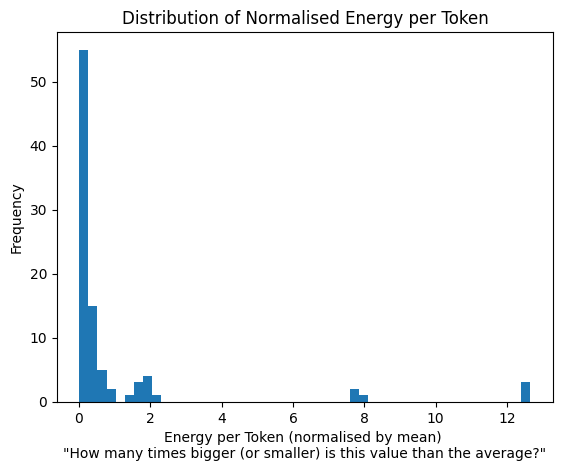

In [10]:
(df['energy_per_token_kwh'] / df['energy_per_token_kwh'].mean()).plot(
    kind='hist',
    bins=50,
    title='Distribution of Normalised Energy per Token',
    xlabel='Energy per Token (normalised by mean) \n"How many times bigger (or smaller) is this value than the average?"',
    ylabel='Frequency'
)

In [11]:
models = df['model'].unique()
print(f"Using models: {models}")

Using models: ['TinyLlama/TinyLlama-1.1B-Chat-v1.0' 'meta-llama/Llama-3.2-1B']


# Absolute Numbers
NB; THIS IS WITH TINY LLAMA -> DO WITH MORE REPRESENTATIVE LLM

1. Incl best vs worst case
2. Removing extremes -> compare between realistic vs artificial settings

In [12]:
from scripts.f_scenario_analysis import compare_energy_to_appliances

In [13]:
compare_energy_to_appliances(df)

== ASSUMING AVERAGE LENGTH: 300 TOKENS ==

Models: ['TinyLlama/TinyLlama-1.1B-Chat-v1.0', 'meta-llama/Llama-3.2-1B']

=== Model: TinyLlama/TinyLlama-1.1B-Chat-v1.0 ===

-- Scenario: Full dataset (79 obs) --

 Overall ratio (max / min): 745.3396578125504 

# of responses to match...
    ...iPhone_charge
            worst-case:     1.68
            best-case:      1251.81
            diff:           1.68
            mean-case:      20.84
    ...laptop_charge
            worst-case:     8.40
            best-case:      6259.07
            diff:           8.41
            mean-case:      104.22
    ...wifi_router_24h
            worst-case:     4.03
            best-case:      3004.35
            diff:           4.04
            mean-case:      50.03
    ...streaming_1hr
            worst-case:     8.40
            best-case:      6259.07
            diff:           8.41
            mean-case:      104.22
    ...google_search
            worst-case:     0.05
            best-case:      37.

NB: this is the TinyLLama model -> do scenarios with largest possible LLaMa model!
Also, do this with non-extreme (all the realistic scenarios vs non-realistic scenarios)

# Modeling

In [14]:
df.columns

Index(['config_name', 'experiment_id', 'date_time', 'model', 'num_processes',
       'batch_size___fixed_batching', 'decoder_temperature', 'decoder_top_k',
       'decoder_top_p', 'latency_simulation_simulate',
       'latency_simulation_delay_max', 'latency_simulation_delay_min',
       'latency_simulation_simulate_burst', 'latency_simulation_burst_size',
       'latency_simulation_burst_interval', 'fp_precision', 'quantization',
       'load_in_8bit', 'load_in_4bit', 'total_input_tokens',
       'total_generated_tokens', 'date_time', 'total_params',
       'max_input_tokens', 'max_output_tokens', 'number_input_prompts',
       'total_energy_kwh', 'total_energy_joules', 'flops', 'tokens_per_joule',
       'joules_per_token', 'flops_per_joule', 'joules_per_flop',
       'total_inference_time_sec', 'average_latency_ms_per_batch',
       'throughput_queries_per_sec', 'throughput_tokens_per_sec',
       'total_energy_kwh_process_0', 'total_energy_kwh_process_1',
       'total_energy_kwh_p


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.936
Model:                              OLS   Adj. R-squared:                  0.930
Method:                   Least Squares   F-statistic:                     151.8
Date:                  Sat, 19 Apr 2025   Prob (F-statistic):           3.15e-46
Time:                          03:57:43   Log-Likelihood:                 1139.2
No. Observations:                    92   AIC:                            -2260.
Df Residuals:                        83   BIC:                            -2238.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

/Users/henrybaker/miniconda3/envs/thesis/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1733: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


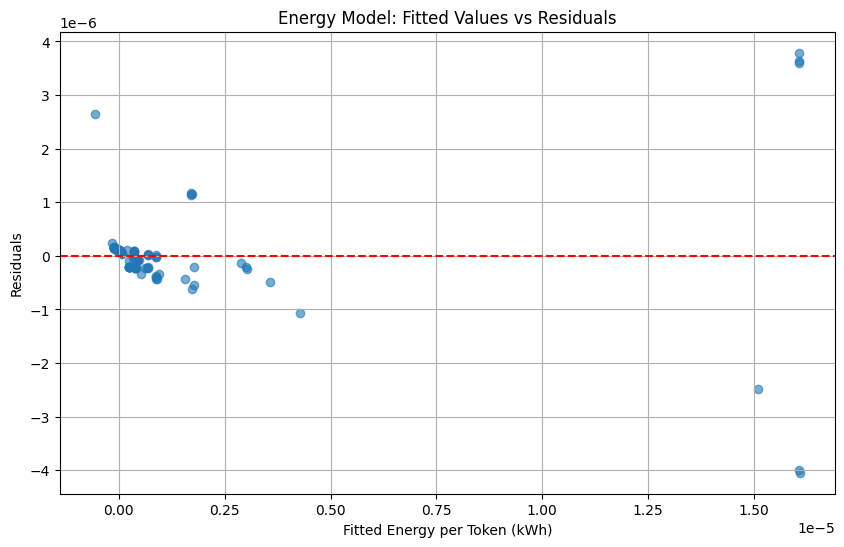

In [15]:
from scripts.d_base_regression import run_full_regression_analysis, preprocess_data

df = preprocess_data(df)

# With custom predictors
custom_predictors = [
                     "num_processes", 
                     "batch_size_numeric", 
                     "C(decoder_config_decoding_mode)", 
                     "C(latency_simulation_simulate)", 
                     "C(fp_precision)", 
                     "C(quantization)", 
                     "total_inference_time_sec"
                     ]
run_full_regression_analysis(df, predictors=custom_predictors)
